In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression

from scipy.sparse import dok_matrix
# You can also use this section to suppress warnings generated by your code:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
warnings.filterwarnings('ignore')
warn()


In [2]:
warn()

In [3]:
def print_sample_and_class(data, class_=1,n_samples=5):

    index=data[data['y']==class_]['X'].index[0:n_samples]

    for i in index:
        print("sample {} of class {}".format(i,class_))
        print(data[data['y']==class_]['X'][i])

In [4]:
df=  pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-GPXX08RAEN/sentiment-text-threeclass/train.txt",header=None, sep="\\|\\|\\|",names=['y','X'])
df.head()

,y,X
0,1,The Rock is destined to be the 21st Century '...
1,1,The gorgeously elaborate continuation of `` T...
2,1,Singer\/composer Bryan Adams contributes a sl...
3,0,You 'd think by now America would have had en...
4,1,Yet the act is still charming here .


In [5]:
print_sample_and_class(df, class_=1,n_samples=5)

sample 0 of class 1
 The Rock is destined to be the 21st Century 's new `` Conan '' and that he 's going to make a splash even greater than Arnold Schwarzenegger , Jean-Claud Van Damme or Steven Segal .
sample 1 of class 1
 The gorgeously elaborate continuation of `` The Lord of the Rings '' trilogy is so huge that a column of words can not adequately describe co-writer\/director Peter Jackson 's expanded vision of J.R.R. Tolkien 's Middle-earth .
sample 2 of class 1
 Singer\/composer Bryan Adams contributes a slew of songs -- a few potential hits , a few more simply intrusive to the story -- but the whole package certainly captures the intended , er , spirit of the piece .
sample 4 of class 1
 Yet the act is still charming here .
sample 5 of class 1
 Whether or not you 're enlightened by any of Derrida 's lectures on `` the other '' and `` the self , '' Derrida is an undeniably fascinating and playful fellow .


In [6]:
my_string=df['X'][0]
print("document:",my_string)
print("\n type:",type(my_string))

document:  The Rock is destined to be the 21st Century 's new `` Conan '' and that he 's going to make a splash even greater than Arnold Schwarzenegger , Jean-Claud Van Damme or Steven Segal .

 type: <class 'str'>


In [7]:
my_string[0:10]

' The Rock '

In [8]:
my_string.split()

['The',
 'Rock',
 'is',
 'destined',
 'to',
 'be',
 'the',
 '21st',
 'Century',
 "'s",
 'new',
 '``',
 'Conan',
 "''",
 'and',
 'that',
 'he',
 "'s",
 'going',
 'to',
 'make',
 'a',
 'splash',
 'even',
 'greater',
 'than',
 'Arnold',
 'Schwarzenegger',
 ',',
 'Jean-Claud',
 'Van',
 'Damme',
 'or',
 'Steven',
 'Segal',
 '.']

In [9]:
my_string.casefold()

" the rock is destined to be the 21st century 's new `` conan '' and that he 's going to make a splash even greater than arnold schwarzenegger , jean-claud van damme or steven segal ."

In [10]:
df["X"].str.casefold()

0        the rock is destined to be the 21st century '...
1        the gorgeously elaborate continuation of `` t...
2        singer\/composer bryan adams contributes a sl...
3        you 'd think by now america would have had en...
4                    yet the act is still charming here .
                              ...                        
8539                                      a real snooze .
8540                                       no surprises .
8541     we 've seen the hippie-turned-yuppie plot bef...
8542     her fans walked out muttering words like `` h...
8543                                  in this case zero .
Name: X, Length: 8544, dtype: object

In [11]:
 # Count the number of "good words" and "bad words" in the text
good_words = ['love', 'good','excellent', 'great','charming']


bad_words = ['hate', 'bad','brutal', 'damnable', 'deplorable', 'detestable', 'disastrous', 'dreadful']

In [12]:
df["score"]=0
for bad_word in bad_words:
    df["score"]-=df["X"].str.casefold().str.count(bad_word)

In [13]:
for good_words in good_words:
    df["score"]+=df["X"].str.casefold().str.count(good_words)

In [14]:
df.head()

,y,X,score
0,1,The Rock is destined to be the 21st Century '...,1
1,1,The gorgeously elaborate continuation of `` T...,0
2,1,Singer\/composer Bryan Adams contributes a sl...,0
3,0,You 'd think by now America would have had en...,0
4,1,Yet the act is still charming here .,1


In [15]:
df.loc[df["score"].argmax(axis=0),'X']

' Good fun , good action , good acting , good dialogue , good pace , good cinematography .'

In [16]:
df.loc[df["score"].argmin(axis=0),'X']

' It is that rare combination of bad writing , bad direction and bad acting -- the trifecta of badness .'

In [21]:
df.groupby("y").mean(numeric_only=True)


,score
y,
-1,0.003021
0,0.057882
1,0.106094


y
-1    Axes(0.125,0.11;0.775x0.77)
 0    Axes(0.125,0.11;0.775x0.77)
 1    Axes(0.125,0.11;0.775x0.77)
Name: score, dtype: object

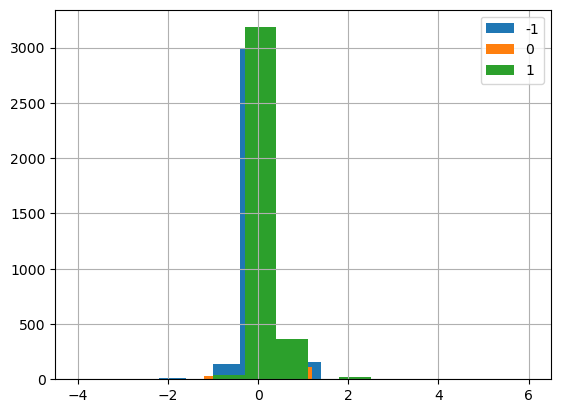

In [22]:
df[["score","y"]].groupby('y')["score"].hist(legend=True)

In [23]:
df['yhat']=0

In [24]:
negative_label=df[['score']].sum(axis=1)<1
pos_label=df[['score']].sum(axis=1)>-1

In [25]:
df['yhat'][negative_label]=-1
df['yhat'][pos_label]=1

In [26]:
df['y'].value_counts()

y
 1    3610
-1    3310
 0    1624
Name: count, dtype: int64

In [27]:
np.mean(df['yhat']==df['y'])

0.43562734082397003

In [28]:
train_dataset=pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-GPXX08RAEN/sentiment-text-threeclass/train.txt",header=None, sep="\\|\\|\\|",names=['y','X']) 
validation_dataset=pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-GPXX08RAEN/sentiment-text-threeclass/dev.txt",header=None, sep="\\|\\|\\|",names=['y','X']) 
test_dataset =pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-GPXX08RAEN/sentiment-text-threeclass/test.txt",header=None, sep="\\|\\|\\|",names=['y','X']) 

In [29]:
from sklearn.feature_extraction.text import CountVectorizer

In [30]:
from sklearn.model_selection import PredefinedSplit, GridSearchCV
from sklearn.linear_model import LogisticRegression

In [31]:
dataset=pd.concat([train_dataset,validation_dataset],axis=0)

In [32]:
from sklearn.model_selection import PredefinedSplit

split_index = [-1]*train_dataset.shape[0] + [0]*validation_dataset.shape[0]
pds = PredefinedSplit(test_fold = split_index)

In [33]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(dataset['X'])
y=dataset['y']

In [34]:
X_test=vectorizer.transform(test_dataset['X'])
y_test=test_dataset[['y']]

In [35]:
param_grid = {'penalty' : ['l1', 'l2'],'C' : np.logspace(-4, 4, 20)}

In [36]:
clf = GridSearchCV(estimator = LogisticRegression(),cv=pds,param_grid=param_grid)
clf

GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
             estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2']})

In [37]:
clf.fit(X, y)
print("highest accuracy in the validation accuracy ",clf.best_score_)
print("best hyperparameters:",clf.best_params_)


highest accuracy in the validation accuracy  0.6185286103542235
best hyperparameters: {'C': 0.23357214690901212, 'penalty': 'l2'}


In [38]:
print(" best parameters accuracy score :",clf.score(X_test,y_test))

 best parameters accuracy score : 0.6506787330316742


In [39]:
model=clf.best_estimator_

In [40]:
model.predict(X_test)

array([ 0,  1,  1, ...,  1, -1, -1], dtype=int64)

In [44]:
feature_importance = model.coef_

for class_ in range(len(model.classes_)):
    print("(j) or y =", class_)

    # Get indices of top 10 features for this class
    top10_idx = np.argsort(feature_importance[class_])[::-1][:10]

    # Print corresponding feature names
    print(vectorizer.get_feature_names_out()[top10_idx])
   

(j) or y = 0
['worst' 'dull' 'stupid' 'bad' 'flat' 'pretentious' 'devoid' 'suffers'
 'lacking' 'stale']
(j) or y = 1
['gag' 'crimes' 'meaning' 'plain' 'nostalgia' 'potential' 'foreign'
 'stand' 'twist' 'southern']
(j) or y = 2
['entertaining' 'refreshing' 'remarkable' 'masterpiece' 'enjoyable' 'fun'
 'solid' 'treat' 'definitely' 'wonderful']


In [47]:
for class_ in range(3):
    print("(j) or y =", class_)

    # Get the indices of the top 10 features (highest weights)
    top10_idx = np.argsort(feature_importance[class_])[::-1][:10]

    # Use those indices to get feature names
    top10_features = vectorizer.get_feature_names_out()[top10_idx]

    print(top10_features)
   

(j) or y = 0
['worst' 'dull' 'stupid' 'bad' 'flat' 'pretentious' 'devoid' 'suffers'
 'lacking' 'stale']
(j) or y = 1
['gag' 'crimes' 'meaning' 'plain' 'nostalgia' 'potential' 'foreign'
 'stand' 'twist' 'southern']
(j) or y = 2
['entertaining' 'refreshing' 'remarkable' 'masterpiece' 'enjoyable' 'fun'
 'solid' 'treat' 'definitely' 'wonderful']


In [48]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Amar\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [49]:
print(stopwords.words('english')[0:10])

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an']


In [52]:
corpus = df["X"].astype(str).tolist()
vectorizer = CountVectorizer(stop_words=stopwords.words('english'))
X_toy = vectorizer.fit_transform(corpus)

In [54]:
new_toy_df = pd.DataFrame(
    X_toy.toarray(),
    columns=vectorizer.get_feature_names_out(),
    index=corpus
)

new_toy_df.head()


,000,10,100,101,102,103,104,105,10th,11,...,zoe,zombie,zone,zoning,zoolander,zoom,zucker,zwick,zzzzzzzzz,élan
"The Rock is destined to be the 21st Century 's new `` Conan '' and that he 's going to make a splash even greater than Arnold Schwarzenegger , Jean-Claud Van Damme or Steven Segal .",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
The gorgeously elaborate continuation of `` The Lord of the Rings '' trilogy is so huge that a column of words can not adequately describe co-writer\/director Peter Jackson 's expanded vision of J.R.R. Tolkien 's Middle-earth .,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"Singer\/composer Bryan Adams contributes a slew of songs -- a few potential hits , a few more simply intrusive to the story -- but the whole package certainly captures the intended , er , spirit of the piece .",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
You 'd think by now America would have had enough of plucky British eccentrics with hearts of gold .,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Yet the act is still charming here .,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
original_toy_df = pd.DataFrame({"text": corpus})
original_toy_df.head()
original_toy_df.head()

,text
0,The Rock is destined to be the 21st Century '...
1,The gorgeously elaborate continuation of `` T...
2,Singer\/composer Bryan Adams contributes a sl...
3,You 'd think by now America would have had en...
4,Yet the act is still charming here .


In [57]:
min_df=2
vectorizer = CountVectorizer(min_df=min_df)
X_toy = vectorizer.fit_transform(corpus)

In [58]:
new_toy_df = pd.DataFrame(
    X_toy.toarray(),
    columns=vectorizer.get_feature_names_out(),
    index=corpus
)

new_toy_df.head()


,000,10,100,101,102,10th,11,110,12,13,...,zeal,zealand,zero,zhang,zhuangzhuang,zingers,zings,zippy,zombie,zone
"The Rock is destined to be the 21st Century 's new `` Conan '' and that he 's going to make a splash even greater than Arnold Schwarzenegger , Jean-Claud Van Damme or Steven Segal .",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
The gorgeously elaborate continuation of `` The Lord of the Rings '' trilogy is so huge that a column of words can not adequately describe co-writer\/director Peter Jackson 's expanded vision of J.R.R. Tolkien 's Middle-earth .,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"Singer\/composer Bryan Adams contributes a slew of songs -- a few potential hits , a few more simply intrusive to the story -- but the whole package certainly captures the intended , er , spirit of the piece .",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
You 'd think by now America would have had enough of plucky British eccentrics with hearts of gold .,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Yet the act is still charming here .,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
original_toy_df.head()

,text
0,The Rock is destined to be the 21st Century '...
1,The gorgeously elaborate continuation of `` T...
2,Singer\/composer Bryan Adams contributes a sl...
3,You 'd think by now America would have had en...
4,Yet the act is still charming here .


In [60]:
max_df=0.75
vectorizer = CountVectorizer(max_df=0.75)
X_toy = vectorizer.fit_transform(corpus)


In [61]:
new_toy_df= pd.DataFrame(X_toy.toarray(),columns=vectorizer.get_feature_names_out(),index=corpus )
new_toy_df.head()

,000,10,100,101,102,103,104,105,10th,11,...,zoe,zombie,zone,zoning,zoolander,zoom,zucker,zwick,zzzzzzzzz,élan
"The Rock is destined to be the 21st Century 's new `` Conan '' and that he 's going to make a splash even greater than Arnold Schwarzenegger , Jean-Claud Van Damme or Steven Segal .",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
The gorgeously elaborate continuation of `` The Lord of the Rings '' trilogy is so huge that a column of words can not adequately describe co-writer\/director Peter Jackson 's expanded vision of J.R.R. Tolkien 's Middle-earth .,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"Singer\/composer Bryan Adams contributes a slew of songs -- a few potential hits , a few more simply intrusive to the story -- but the whole package certainly captures the intended , er , spirit of the piece .",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
You 'd think by now America would have had enough of plucky British eccentrics with hearts of gold .,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Yet the act is still charming here .,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
from sklearn.pipeline import Pipeline

In [63]:
pipe = Pipeline(steps=[("CV", CountVectorizer()),  ("LR", LogisticRegression())])

In [64]:
param_grid = {
    "CV__stop_words":[stopwords.words('english')[0:n] for n in range(1,150,50)],
    "CV__min_df":[5**n for n in range(5)],
    "CV__max_df":[0.6,0.9],
    "LR__penalty":["l1", "l2"]
}


In [65]:
clf = GridSearchCV(pipe, param_grid ,cv=pds)
clf 

GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
             estimator=Pipeline(steps=[('CV', CountVectorizer()),
                                       ('LR', LogisticRegression())]),
             param_grid={'CV__max_df': [0.6, 0.9],
                         'CV__min_df': [1, 5, 25, 125, 625],
                         'CV__stop_words': [['a'],
                                            ['a', 'about', 'above', 'after',
                                             'again', 'against', 'ain', 'all',
                                             'am', 'an', 'and', 'any', 'are',
                                             'aren', "aren't", 'as', 'at', 'be',
                                             'because', 'been', 'before',
                                             'being', 'below', 'between',
                                             'both', 'but', 'by', 'can',
                                             'couldn', "couldn't", ...],
                                            ['a', 'about', 'above', 'after',
                                             'again', 'against', 'ain', 'all',
                                             'am', 'an', 'and', 'any', 'are',
                                             'aren', "aren't", 'as', 'at', 'be',
                                             'because', 'been', 'before',
                                             'being', 'below', 'between',
                                             'both', 'but', 'by', 'can',
                                             'couldn', "couldn't", ...]],
                         'LR__penalty': ['l1', 'l2']})

In [66]:
clf.fit(dataset['X'], y)

GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
             estimator=Pipeline(steps=[('CV', CountVectorizer()),
                                       ('LR', LogisticRegression())]),
             param_grid={'CV__max_df': [0.6, 0.9],
                         'CV__min_df': [1, 5, 25, 125, 625],
                         'CV__stop_words': [['a'],
                                            ['a', 'about', 'above', 'after',
                                             'again', 'against', 'ain', 'all',
                                             'am', 'an', 'and', 'any', 'are',
                                             'aren', "aren't", 'as', 'at', 'be',
                                             'because', 'been', 'before',
                                             'being', 'below', 'between',
                                             'both', 'but', 'by', 'can',
                                             'couldn', "couldn't", ...],
                                            ['a', 'about', 'above', 'after',
                                             'again', 'against', 'ain', 'all',
                                             'am', 'an', 'and', 'any', 'are',
                                             'aren', "aren't", 'as', 'at', 'be',
                                             'because', 'been', 'before',
                                             'being', 'below', 'between',
                                             'both', 'but', 'by', 'can',
                                             'couldn', "couldn't", ...]],
                         'LR__penalty': ['l1', 'l2']})

In [67]:
print("highest accuracy in the validation",clf.best_score_)
print("best hyperparameters :",clf.best_params_)

highest accuracy in the validation 0.5967302452316077
best hyperparameters : {'CV__max_df': 0.6, 'CV__min_df': 1, 'CV__stop_words': ['a'], 'LR__penalty': 'l2'}


In [68]:
print(" best parameters best parameters accuracy score :",clf.score(test_dataset['X'],y_test))

 best parameters best parameters accuracy score : 0.639366515837104


In [69]:
 corpus

[" The Rock is destined to be the 21st Century 's new `` Conan '' and that he 's going to make a splash even greater than Arnold Schwarzenegger , Jean-Claud Van Damme or Steven Segal .",
 " The gorgeously elaborate continuation of `` The Lord of the Rings '' trilogy is so huge that a column of words can not adequately describe co-writer\\/director Peter Jackson 's expanded vision of J.R.R. Tolkien 's Middle-earth .",
 ' Singer\\/composer Bryan Adams contributes a slew of songs -- a few potential hits , a few more simply intrusive to the story -- but the whole package certainly captures the intended , er , spirit of the piece .',
 " You 'd think by now America would have had enough of plucky British eccentrics with hearts of gold .",
 ' Yet the act is still charming here .',
 " Whether or not you 're enlightened by any of Derrida 's lectures on `` the other '' and `` the self , '' Derrida is an undeniably fascinating and playful fellow .",
 ' Just the labour involved in creating the lay

In [70]:
vectorizer=CountVectorizer()
X_toy = vectorizer.fit_transform(corpus)

In [72]:
tf_dataframe=pd.DataFrame(X_toy.toarray(),index=corpus,columns=vectorizer.get_feature_names_out())
tf_dataframe

,000,10,100,101,102,103,104,105,10th,11,...,zoe,zombie,zone,zoning,zoolander,zoom,zucker,zwick,zzzzzzzzz,élan
"The Rock is destined to be the 21st Century 's new `` Conan '' and that he 's going to make a splash even greater than Arnold Schwarzenegger , Jean-Claud Van Damme or Steven Segal .",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
The gorgeously elaborate continuation of `` The Lord of the Rings '' trilogy is so huge that a column of words can not adequately describe co-writer\/director Peter Jackson 's expanded vision of J.R.R. Tolkien 's Middle-earth .,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"Singer\/composer Bryan Adams contributes a slew of songs -- a few potential hits , a few more simply intrusive to the story -- but the whole package certainly captures the intended , er , spirit of the piece .",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
You 'd think by now America would have had enough of plucky British eccentrics with hearts of gold .,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Yet the act is still charming here .,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A real snooze .,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
No surprises .,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"We 've seen the hippie-turned-yuppie plot before , but there 's an enthusiastic charm in Fire that makes the formula fresh again .",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"Her fans walked out muttering words like `` horrible '' and `` terrible , '' but had so much fun dissing the film that they did n't mind the ticket cost .",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [73]:
from sklearn.feature_extraction.text import TfidfTransformer

In [75]:
pd.DataFrame(TfidfTransformer().fit_transform(tf_dataframe).toarray(),index=corpus,columns=vectorizer.get_feature_names_out())


,000,10,100,101,102,103,104,105,10th,11,...,zoe,zombie,zone,zoning,zoolander,zoom,zucker,zwick,zzzzzzzzz,élan
"The Rock is destined to be the 21st Century 's new `` Conan '' and that he 's going to make a splash even greater than Arnold Schwarzenegger , Jean-Claud Van Damme or Steven Segal .",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
The gorgeously elaborate continuation of `` The Lord of the Rings '' trilogy is so huge that a column of words can not adequately describe co-writer\/director Peter Jackson 's expanded vision of J.R.R. Tolkien 's Middle-earth .,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Singer\/composer Bryan Adams contributes a slew of songs -- a few potential hits , a few more simply intrusive to the story -- but the whole package certainly captures the intended , er , spirit of the piece .",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You 'd think by now America would have had enough of plucky British eccentrics with hearts of gold .,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Yet the act is still charming here .,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A real snooze .,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
No surprises .,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"We 've seen the hippie-turned-yuppie plot before , but there 's an enthusiastic charm in Fire that makes the formula fresh again .",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Her fans walked out muttering words like `` horrible '' and `` terrible , '' but had so much fun dissing the film that they did n't mind the ticket cost .",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [76]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [77]:
pipe = Pipeline(steps=[("CV", TfidfVectorizer()),  ("LR", LogisticRegression())])

In [78]:
param_grid = {
    "CV__stop_words":[stopwords.words('english')[0:n] for n in range(1,150,50)],
    "CV__min_df":[5**n for n in range(5)],
    "CV__max_df":[0.6,0.9],
    "LR__penalty":["l1", "l2"]
}

In [79]:
clf = GridSearchCV(pipe, param_grid ,cv=pds)
clf

GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
             estimator=Pipeline(steps=[('CV', TfidfVectorizer()),
                                       ('LR', LogisticRegression())]),
             param_grid={'CV__max_df': [0.6, 0.9],
                         'CV__min_df': [1, 5, 25, 125, 625],
                         'CV__stop_words': [['a'],
                                            ['a', 'about', 'above', 'after',
                                             'again', 'against', 'ain', 'all',
                                             'am', 'an', 'and', 'any', 'are',
                                             'aren', "aren't", 'as', 'at', 'be',
                                             'because', 'been', 'before',
                                             'being', 'below', 'between',
                                             'both', 'but', 'by', 'can',
                                             'couldn', "couldn't", ...],
                                            ['a', 'about', 'above', 'after',
                                             'again', 'against', 'ain', 'all',
                                             'am', 'an', 'and', 'any', 'are',
                                             'aren', "aren't", 'as', 'at', 'be',
                                             'because', 'been', 'before',
                                             'being', 'below', 'between',
                                             'both', 'but', 'by', 'can',
                                             'couldn', "couldn't", ...]],
                         'LR__penalty': ['l1', 'l2']})

In [80]:
clf.fit(dataset['X'], y)

GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
             estimator=Pipeline(steps=[('CV', TfidfVectorizer()),
                                       ('LR', LogisticRegression())]),
             param_grid={'CV__max_df': [0.6, 0.9],
                         'CV__min_df': [1, 5, 25, 125, 625],
                         'CV__stop_words': [['a'],
                                            ['a', 'about', 'above', 'after',
                                             'again', 'against', 'ain', 'all',
                                             'am', 'an', 'and', 'any', 'are',
                                             'aren', "aren't", 'as', 'at', 'be',
                                             'because', 'been', 'before',
                                             'being', 'below', 'between',
                                             'both', 'but', 'by', 'can',
                                             'couldn', "couldn't", ...],
                                            ['a', 'about', 'above', 'after',
                                             'again', 'against', 'ain', 'all',
                                             'am', 'an', 'and', 'any', 'are',
                                             'aren', "aren't", 'as', 'at', 'be',
                                             'because', 'been', 'before',
                                             'being', 'below', 'between',
                                             'both', 'but', 'by', 'can',
                                             'couldn', "couldn't", ...]],
                         'LR__penalty': ['l1', 'l2']})

In [81]:
print("highest accuracy in the validation",clf.best_score_)
print("best hyperparameters :",clf.best_params_)

highest accuracy in the validation 0.6276112624886467
best hyperparameters : {'CV__max_df': 0.6, 'CV__min_df': 1, 'CV__stop_words': ['a'], 'LR__penalty': 'l2'}


In [82]:
print(" best parameters best parameters accuracy score :",clf.score(test_dataset['X'],y_test))

 best parameters best parameters accuracy score : 0.6592760180995475
